# Interface for MRISynthStrip

__Author:__ Moni Dörig

### References:

__SynthStrip:__

- SynthStrip: Skull-Stripping for Any Brain Image; Andrew Hoopes, Jocelyn S. Mora, Adrian V. Dalca, Bruce Fischl*, Malte Hoffmann* (*equal contribution); NeuroImage 260, 2022, 119474; https://doi.org/10.1016/j.neuroimage.2022.119474

- Boosting skull-stripping performance for pediatric brain images; William Kelley, Nathan Ngo, Adrian V. Dalca, Bruce Fischl, Lilla Zöllei*, Malte Hoffmann* (*equal contribution); IEEE International Symposium on Biomedical Imaging (ISBI), 2024, forthcoming; https://arxiv.org/abs/2402.16634


- SynthStrip tool: https://w3id.org/synthstrip


__Opensource Data from OpenNeuro:__
- Kelly AMC and Uddin LQ and Biswal BB and Castellanos FX and Milham MP (2018). Flanker task (event-related). OpenNeuro. [Dataset](https://openneuro.org/datasets/ds000102/versions/00001)

In [1]:
# The mri_synthstrip utility has been included in FreeSurfer since the v7.3.0 release
import lmod
await lmod.load('freesurfer/7.4.1')
await lmod.list()

['freesurfer/7.4.1']

In [2]:
%%capture
!pip install nilearn

In [3]:
import os
import sys
from nilearn import plotting

### Download opensource data

In [4]:
%%capture

# download data
PATTERN = "sub-08/anat"
!datalad install https://github.com/OpenNeuroDatasets/ds000102.git
!cd ds000102 && datalad get $PATTERN

In [5]:
!cd ds000102/sub-08 && tree -L 4

.
├── anat
│   └── sub-08_T1w.nii.gz -> ../../.git/annex/objects/mw/MM/MD5E-s10561256--b94dddd8dc1c146aa8cd97f8d9994146.nii.gz/MD5E-s10561256--b94dddd8dc1c146aa8cd97f8d9994146.nii.gz
└── func
    ├── sub-08_task-flanker_run-1_bold.nii.gz -> ../../.git/annex/objects/zX/v9/MD5E-s28641609--47314e6d1a14b8545686110b5b67f8b8.nii.gz/MD5E-s28641609--47314e6d1a14b8545686110b5b67f8b8.nii.gz
    ├── sub-08_task-flanker_run-1_events.tsv
    ├── sub-08_task-flanker_run-2_bold.nii.gz -> ../../.git/annex/objects/WZ/F0/MD5E-s28636310--4535bf26281e1c5556ad0d3468e7fe4e.nii.gz/MD5E-s28636310--4535bf26281e1c5556ad0d3468e7fe4e.nii.gz
    └── sub-08_task-flanker_run-2_events.tsv

2 directories, 5 files


In [6]:
# define path of the anatomical image
anat = os.path.abspath(os.path.join('.', 'ds000102/sub-08/anat/sub-08_T1w.nii.gz'))

In [7]:
# add the interface directory to sys.path
scripts_dir = os.path.abspath(os.path.join('.', 'interfaces'))

if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

In [8]:
# import MRISynthrip class
from mri_synthstrip_interface import MRISynthStrip

In [9]:
MRISynthStrip.help()

Wraps the executable command ``mri_synthstrip``.

Inputs::

        [Mandatory]
        in_file: (a pathlike object or string representing an existing file)
                Input T1-weighted MRI file
                argument: ``--i %s``

        [Optional]
        out_file: (a pathlike object or string representing a file, nipype
                  default value: brain.nii.gz)
                Output brain-extracted image file
                argument: ``--o %s``
        out_mask_filename: (a string, nipype default value:
                  brain_mask.nii.gz)
                Filename for output brain mask
                argument: ``--mask %s``
        no_csf: (a boolean)
                Do not include CSF in the brain mask
                argument: ``--no-csf``
        boundary_distance: (an integer)
                Boundary distance from the brain in millimeters
                argument: ``-b %d``
        args: (a string)
                Additional parameters to the command
            

In [10]:
# run MRISynthStrip Interface without optional inputs
synthstrip = MRISynthStrip() #can be used as standalone interface or within Nodes in a nipype workflow

synthstrip.inputs.in_file = anat
result = synthstrip.run()

240829-11:52:33,388 nipype.interface INFO:
	 stdout 2024-08-29T11:52:33.388506:Configuring model on the CPU
240829-11:52:33,389 nipype.interface INFO:
	 stdout 2024-08-29T11:52:33.388506:Running SynthStrip model version 1
240829-11:52:33,390 nipype.interface INFO:
	 stdout 2024-08-29T11:52:33.388506:Input image read from: /mnt/neurodesktop-storage/Clean_notebooks/ds000102/sub-08/anat/sub-08_T1w.nii.gz
240829-11:53:03,70 nipype.interface INFO:
	 stdout 2024-08-29T11:53:03.070134:Processing frame (of 1): 1 done
240829-11:53:03,71 nipype.interface INFO:
	 stdout 2024-08-29T11:53:03.070134:Masked image saved to: brain.nii.gz
240829-11:53:03,72 nipype.interface INFO:
	 stdout 2024-08-29T11:53:03.070134:Binary brain mask saved to: brain_mask.nii.gz
240829-11:53:03,80 nipype.interface INFO:
	 stdout 2024-08-29T11:53:03.070134:
240829-11:53:03,88 nipype.interface INFO:
	 stdout 2024-08-29T11:53:03.070134:If you use SynthStrip in your analysis, please cite:
240829-11:53:03,88 nipype.interface I

In [11]:
print(result.outputs)


mask_file = /mnt/neurodesktop-storage/Clean_notebooks/brain_mask.nii.gz
out_file = /mnt/neurodesktop-storage/Clean_notebooks/brain.nii.gz



### Plot anatomical and brain extracted images and binary mask

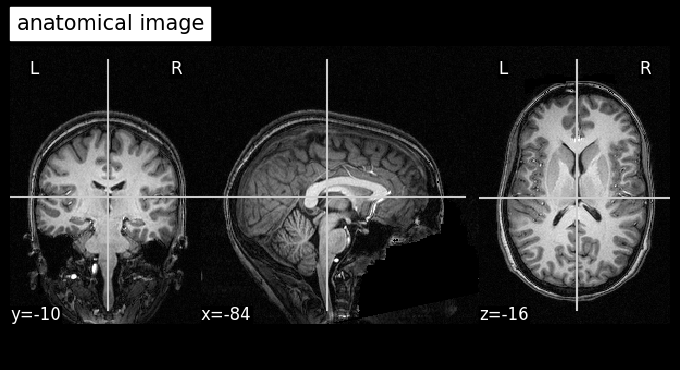

In [12]:
plotting.plot_anat(anat, vmin=0, vmax=500, title='anatomical image')

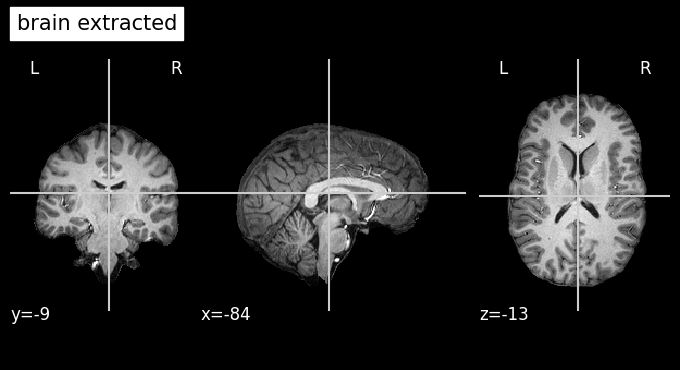

In [13]:
plotting.plot_anat(result.outputs.out_file, vmin=0, vmax=500, title='brain extracted')

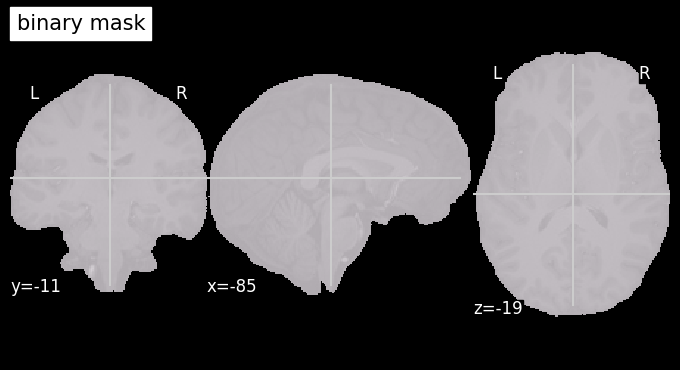

In [14]:
plotting.plot_roi(result.outputs.mask_file, bg_img = result.outputs.out_file, vmin=0, vmax=1, title='binary mask')